In [1]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

In [9]:
from windrose import WindroseAxes, WindAxes, plot_windrose

In [10]:
d = 'data/meteoTot1min (1).csv'

In [12]:
ds = (
    pd.read_csv(d, index_col=0, parse_dates=[0])
)

In [13]:
ds

,vv1m,dv1m,vmax1m,dmax1m,ta,hr,pres,prec1m,inso,vis,vv1mx,vv1my
timestampx,,,,,,,,,,,,
2022-04-01 01:00:00,4.9,53,5.2,54,5.4,42,769.1,0.0,0.0,20000.0,3.913314,2.948894
2022-04-01 01:01:00,4.6,50,5.3,53,5.4,41,769.1,0.0,NaN,NaN,3.523804,2.956823
2022-04-01 01:02:00,4.9,51,5.6,50,5.4,40,769.1,0.0,NaN,NaN,3.808015,3.083670
2022-04-01 01:03:00,4.7,52,5.2,51,5.5,40,769.1,0.0,NaN,NaN,3.703651,2.893609
2022-04-01 01:04:00,4.1,49,5.0,59,5.5,40,769.1,0.0,NaN,NaN,3.094309,2.689842
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01 00:55:00,8.1,320,8.7,322,9.8,36,771.0,0.0,NaN,NaN,-5.206580,6.204960
2022-07-01 00:56:00,7.9,317,8.6,316,9.8,36,771.0,0.0,NaN,NaN,-5.387787,5.777694
2022-07-01 00:57:00,7.7,318,8.5,324,9.8,36,770.9,0.0,NaN,NaN,-5.152306,5.722215


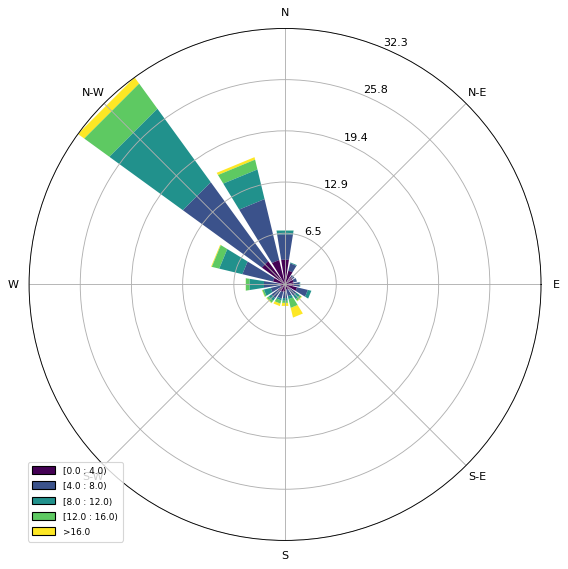

In [20]:
ax = WindroseAxes.from_ax()

ax.bar(ds.dv1m.values,ds.vv1m.values, normed = True, bins=np.arange(0.01,20,4))
ax.set_legend()

0

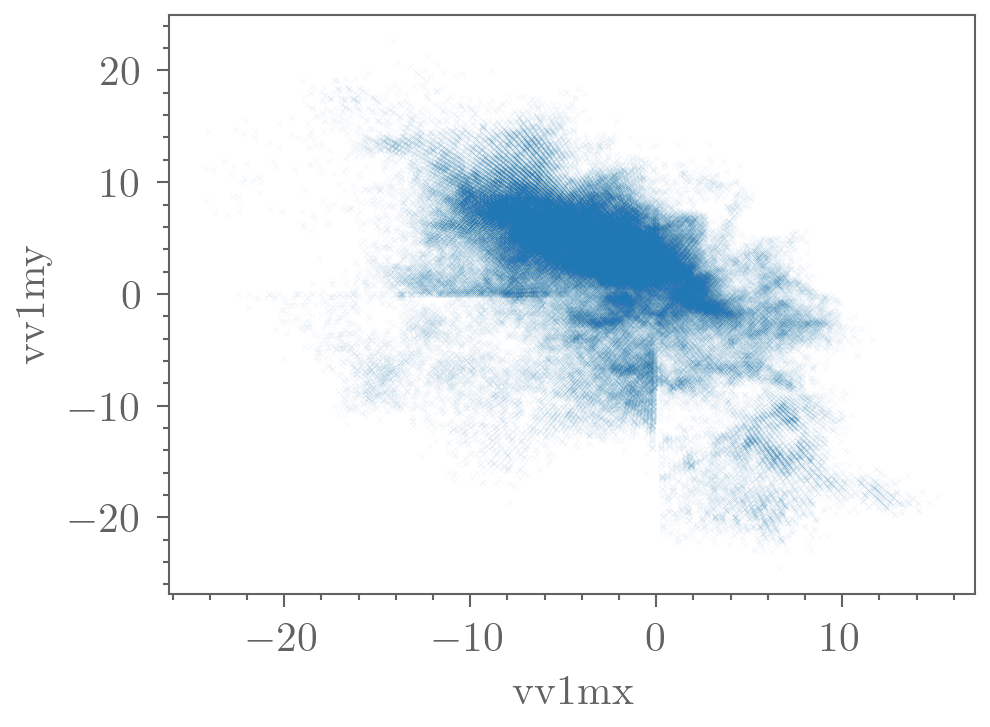

In [60]:
#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    'acp',
    #'notebook',
    # 'sp-grid',
    'no-black',
    'illustrator-safe'
])
#endregion sciplot
(
    ds
    .assign(hour=lambda d:d.index.hour)
    # .groupby('hour')
    # .mean()
    [['vv1mx','vv1my']]
    .plot.scatter(
        'vv1mx','vv1my',
        alpha=.05,
        marker='x',
        linewidth=.2,
        s = 2
    )
)

f:plt.Figure = plt.gcf()
f.set_dpi(300)
plt.tight_layout()
#region temp open fig
_p_ = '/tmp/f.pdf';plt.gcf().savefig(_p_,transparent=True);
os.system(f'open {_p_}')
#endregion temp open fig


<AxesSubplot: xlabel='hour'>

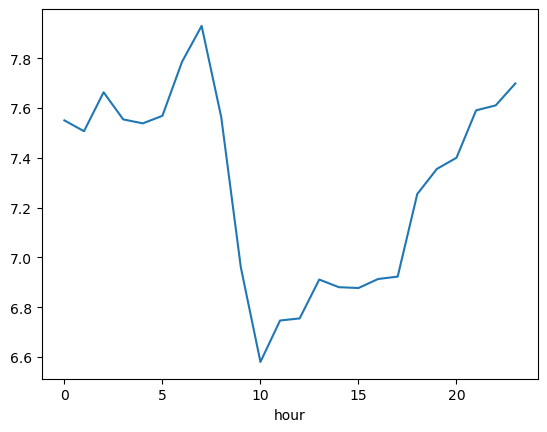

In [28]:
(
    ds
    .assign(hour=lambda d:d.index.hour)
    .groupby('hour')
    .mean()
    ['vv1m']
    .plot()
)

<AxesSubplot: xlabel='hour'>

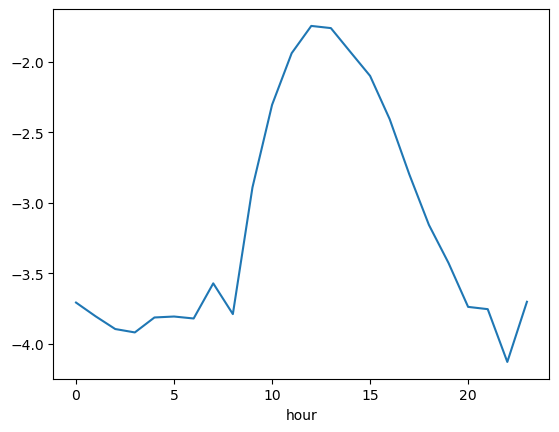

In [30]:
(
    ds
    .assign(hour=lambda d:d.index.hour)
    .groupby('hour')
    .median()
    ['vv1mx']
    .plot()
)

<AxesSubplot: xlabel='hour'>

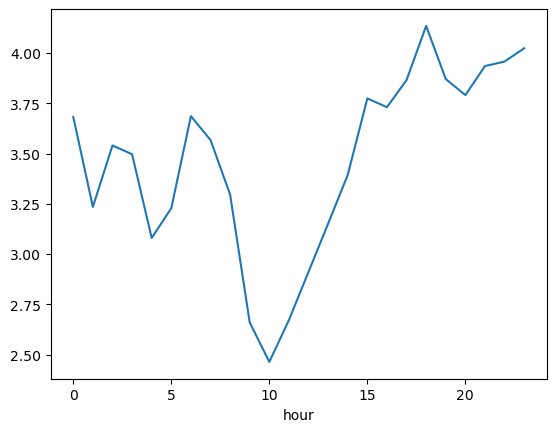

In [31]:
(
    ds
    .assign(hour=lambda d:d.index.hour)
    .groupby('hour')
    .median()
    ['vv1my']
    .plot()
)

<AxesSubplot: xlabel='hour'>

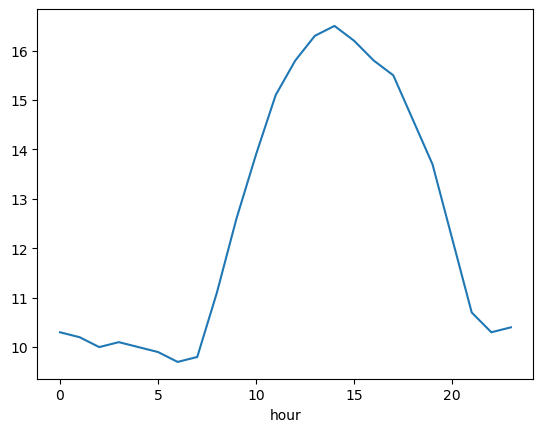

In [32]:
(
    ds
    .assign(hour=lambda d:d.index.hour)
    .groupby('hour')
    .median()
    ['ta']
    .plot()
)

<AxesSubplot: xlabel='hour'>

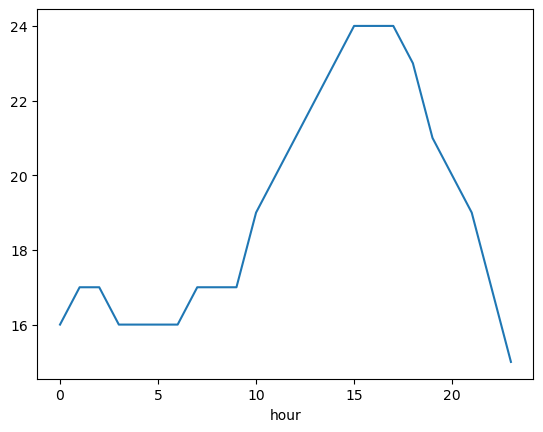

In [33]:
(
    ds
    .assign(hour=lambda d:d.index.hour)
    .groupby('hour')
    .median()
    ['hr']
    .plot()
)